# Notebook Imports

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff
import math
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Example 1 - A Simple Cost Function

$ f(x) = x^2 + x + 1 $

In [2]:
def f(x):
    return x**2 + x + 1


In [3]:
# get data
# the np.linspace function generates numbers(100) that are evenly spaced number for the given interval (-3, 3)
x_1 = np.linspace(start=-3, stop=3, num=100, endpoint=False)
x_1

array([-3.  , -2.94, -2.88, -2.82, -2.76, -2.7 , -2.64, -2.58, -2.52,
       -2.46, -2.4 , -2.34, -2.28, -2.22, -2.16, -2.1 , -2.04, -1.98,
       -1.92, -1.86, -1.8 , -1.74, -1.68, -1.62, -1.56, -1.5 , -1.44,
       -1.38, -1.32, -1.26, -1.2 , -1.14, -1.08, -1.02, -0.96, -0.9 ,
       -0.84, -0.78, -0.72, -0.66, -0.6 , -0.54, -0.48, -0.42, -0.36,
       -0.3 , -0.24, -0.18, -0.12, -0.06,  0.  ,  0.06,  0.12,  0.18,
        0.24,  0.3 ,  0.36,  0.42,  0.48,  0.54,  0.6 ,  0.66,  0.72,
        0.78,  0.84,  0.9 ,  0.96,  1.02,  1.08,  1.14,  1.2 ,  1.26,
        1.32,  1.38,  1.44,  1.5 ,  1.56,  1.62,  1.68,  1.74,  1.8 ,
        1.86,  1.92,  1.98,  2.04,  2.1 ,  2.16,  2.22,  2.28,  2.34,
        2.4 ,  2.46,  2.52,  2.58,  2.64,  2.7 ,  2.76,  2.82,  2.88,
        2.94])

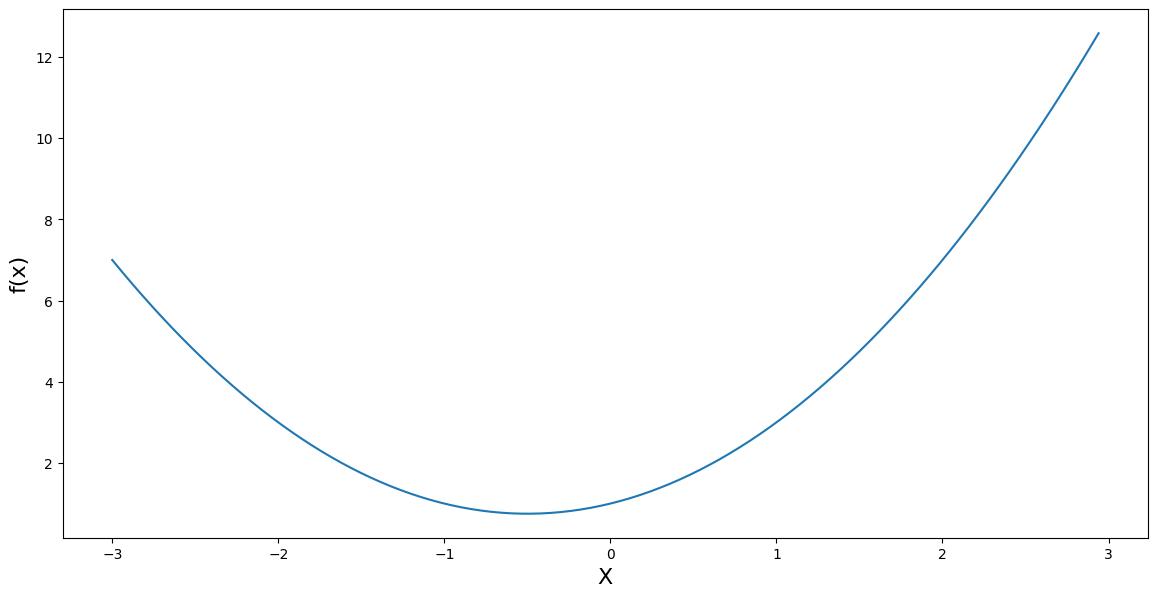

In [4]:
plt.figure(figsize=(14,7), dpi=100)
plt.plot(x_1, f(x_1))
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.show()

# Slope And Derivatives

In [5]:
def df(x):
    return 2 * x + 1

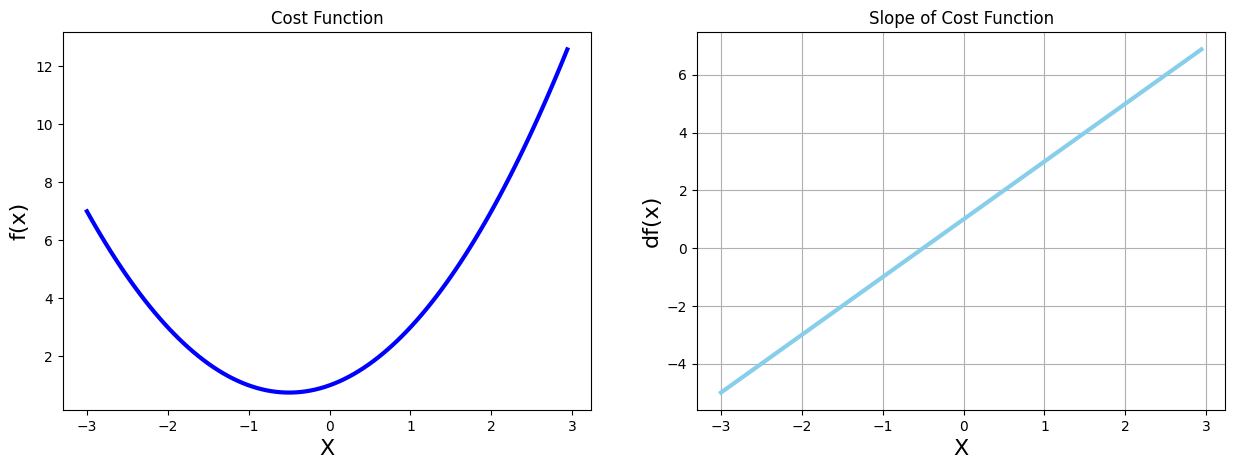

In [6]:
plt.figure(figsize=[15,5], dpi=100)

# chart 1: Cost Function
plt.subplot(1, 2, 1)  
# subplot is used to plot 2 plots side by side args =>(no. of rows, no. of cols., index)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# chart 2: Derivatives
plt.subplot(1, 2, 2)
plt.title('Slope of Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=3)
plt.show()

## Gradient Descent

In [7]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001
x_list = []
slope_list = []

for x in range(1000):
    previous_x = new_x  # made a prediction
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient # calculated the error
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - previous_x)
    if step_size < precision:
        print('Loop ran ', x, 'times')
        break
    #  start the loop over again, to learn


print('The Local Minimum occur at', new_x)
print('The cost at this point is', f(new_x))
print('The slope at this point is', df(new_x))

Loop ran  50 times
The Local Minimum occur at -0.49996003706460423
The cost at this point is 0.7500000015970362
The slope at this point is 7.992587079153068e-05


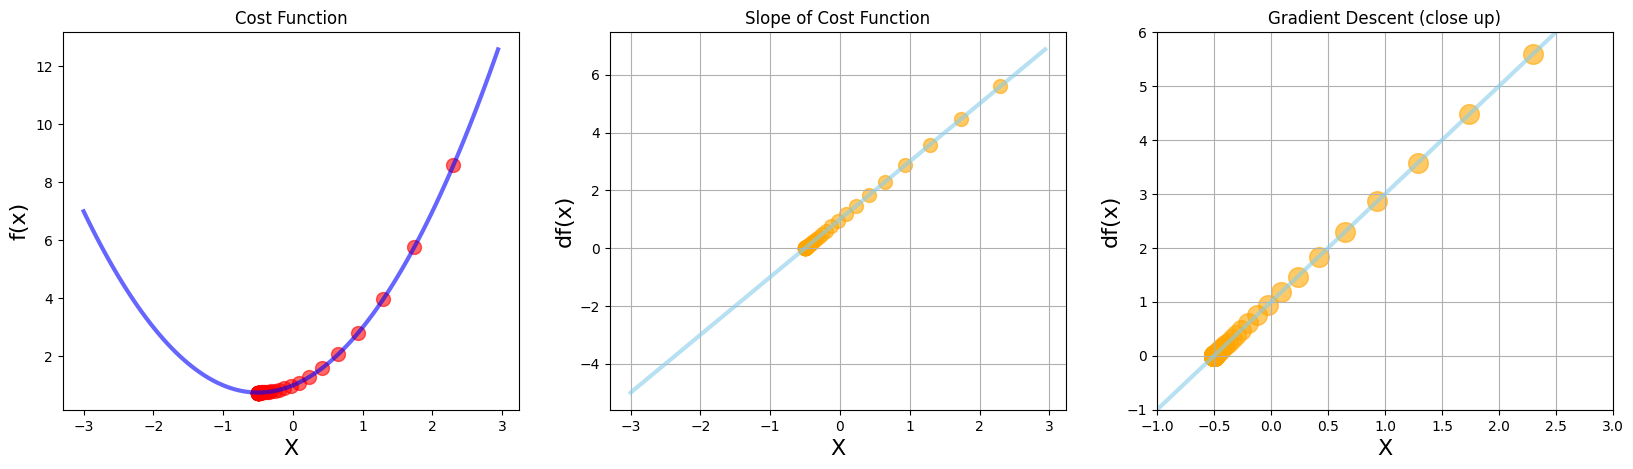

In [8]:
plt.figure(figsize=[20,5], dpi=100)

# chart 1: Cost Function
plt.subplot(1, 3, 1)  
# subplot is used to plot 2 plots side by side args =>(no. of rows, no. of cols., index)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.6)
values = np.array(x_list)
plt.scatter(x_list, f(values), c='red', s=100, alpha=0.6)

# chart 2: Derivatives
plt.subplot(1, 3, 2)
plt.title('Slope of Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(x_list, slope_list, c='orange', s=100, alpha=0.6)


# chart 2: Derivatives(close-up)
plt.subplot(1, 3, 3)
plt.title('Gradient Descent (close up)')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim(-1, 3)
plt.ylim(-1, 6)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(x_list, slope_list, c='orange', s=200, alpha=0.6)

plt.show()

# Example 2- Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5 $$

In [9]:
x_2 = np.linspace(-2, 2, 1000)


In [10]:
def g(x):
    return x**4 - (4*x**2) + 5

In [11]:
def dg(x):
    return (4*x**3) - 8*x

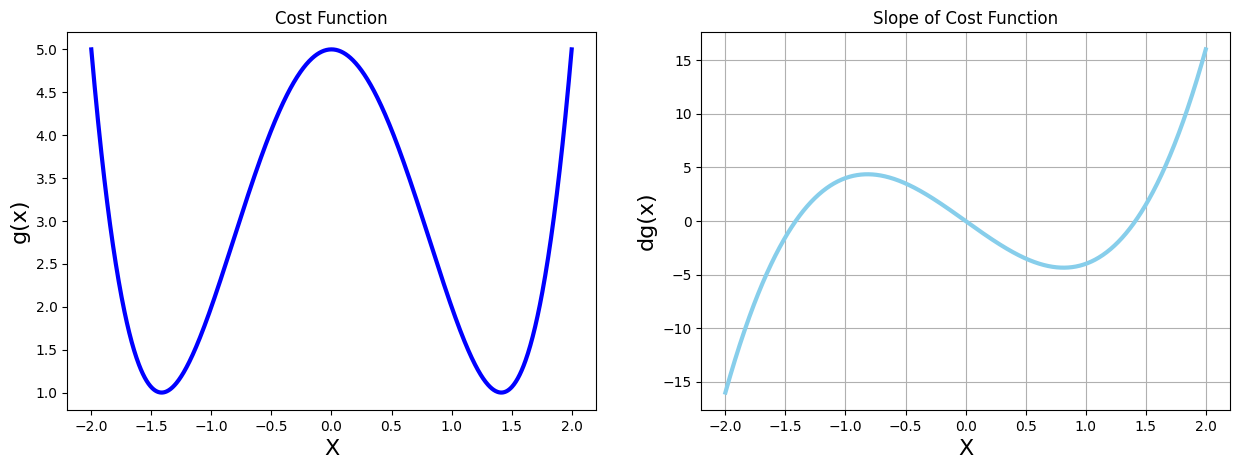

In [12]:
plt.figure(figsize=[15,5], dpi=100)

# chart 1: Cost Function
plt.subplot(1, 2, 1)  
# subplot is used to plot 2 plots side by side args =>(no. of rows, no. of cols., index)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# chart 2: Derivatives
plt.subplot(1, 2, 2)
plt.title('Slope of Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3)
plt.show()

## Gradient Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for x in range(max_iter):
        previous_x = new_x  # made a prediction
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient # calculated the error
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        step_size = abs(new_x - previous_x)
        if step_size < precision:
            print('Loop ran ', x, 'times')
            break
    return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('local min. occurs at:', local_min)
print('Number of steps:', len(list_x))

Loop ran  21 times
local min. occurs at: 1.4122375085019094
Number of steps: 23


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5,
                                                 multiplier=0.02, precision=0.001)
print('local min. occurs at:', local_min)
print('Number of steps:', len(list_x))

Loop ran  21 times
local min. occurs at: 1.4122375085019094
Number of steps: 23


In [16]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0)
print('local min. occurs at:', local_min)
print('Number of steps:', len(list_x))

Loop ran  0 times
local min. occurs at: 0.0
Number of steps: 2


Loop ran  0 times


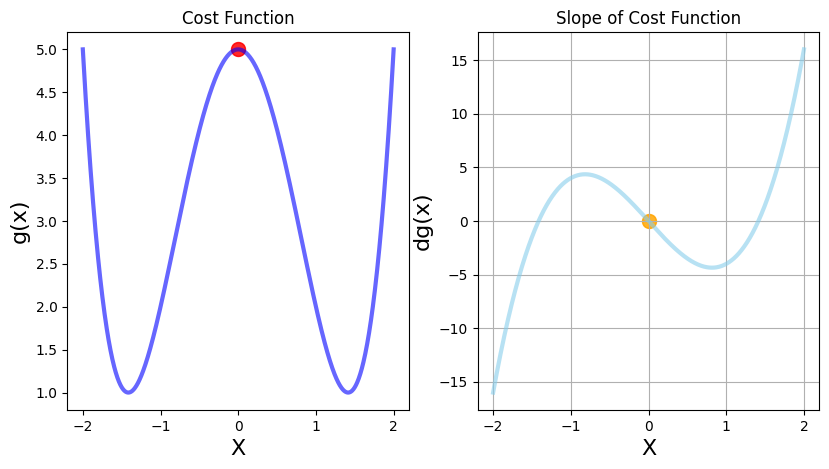

In [17]:
# calling gradient_descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0)

plt.figure(figsize=[15, 5], dpi=100)
# chart 1: Cost Function
plt.subplot(1, 3, 1)  
# subplot is used to plot 2 plots side by side args =>(no. of rows, no. of cols., index)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.6)
values = np.array(list_x)
plt.scatter(list_x, g(values), c='red', s=100, alpha=0.6)

# chart 2: Derivatives
plt.subplot(1, 3, 2)
plt.title('Slope of Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, c='orange', s=100, alpha=0.6)
plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

$$ h(x) = x^5 - 2x^4 + 2 $$

In [18]:
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

In [19]:
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

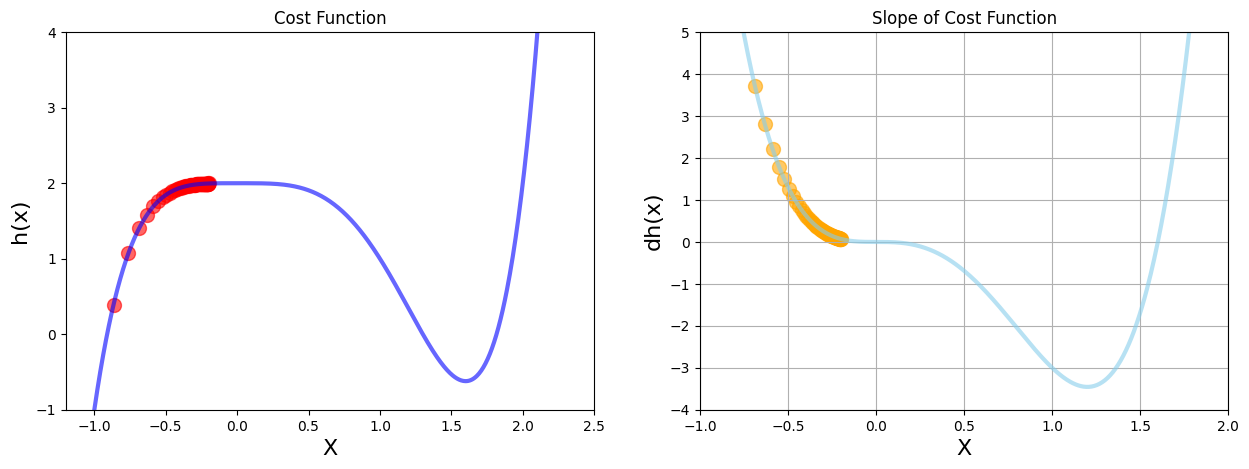

Local Min. Occurs at:  -2071072.4470816324
Cost at local min.:  -3.810455326061589e+31
No. of steps:  71


In [20]:
# calling gradient_descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=70)

plt.figure(figsize=[15, 5], dpi=100)
# chart 1: Cost Function
plt.subplot(1, 2, 1)  
# subplot is used to plot 2 plots side by side args =>(no. of rows, no. of cols., index)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.6)
values = np.array(list_x)
plt.scatter(list_x, h(values), c='red', s=100, alpha=0.6)

# chart 2: Derivatives
plt.subplot(1, 2, 2)
plt.title('Slope of Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.plot(x_3, dh(x_3), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, c='orange', s=100, alpha=0.6)
plt.show()

print('Local Min. Occurs at: ', local_min)
print('Cost at local min.: ', h(local_min))
print('No. of steps: ', len(list_x))

In [21]:
import sys

# sys.version
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

## Tuples


In [22]:
tup = 1, 2, 3, 4
print(type(tup))

tu = (1, 2, 3, 4)
print(type(tu))

<class 'tuple'>
<class 'tuple'>


In [23]:
# for single item tuples make sure to add a trailing comma to the single item

up = 1,
print(type(up))

u = (1,)
print(type(u))

<class 'tuple'>
<class 'tuple'>


In [24]:
# tuples can contain multiple data types unlike lists that need a homogenous data type

heterogenous_tup = (1, 'hello', 1.2, 'meeka')
print(type(heterogenous_tup))

<class 'tuple'>


In [25]:
# tuple packing
meals = 'bacon', 'cake', 'lettuce'

# sequence unpacking
breakfast, lunch, dinner = meals
print(f'I had {breakfast} for breakfast')
print(f'I had {lunch} for lunch')
print(f'I had {dinner} for dinner')

I had bacon for breakfast
I had cake for lunch
I had lettuce for dinner


# The Learning Rate

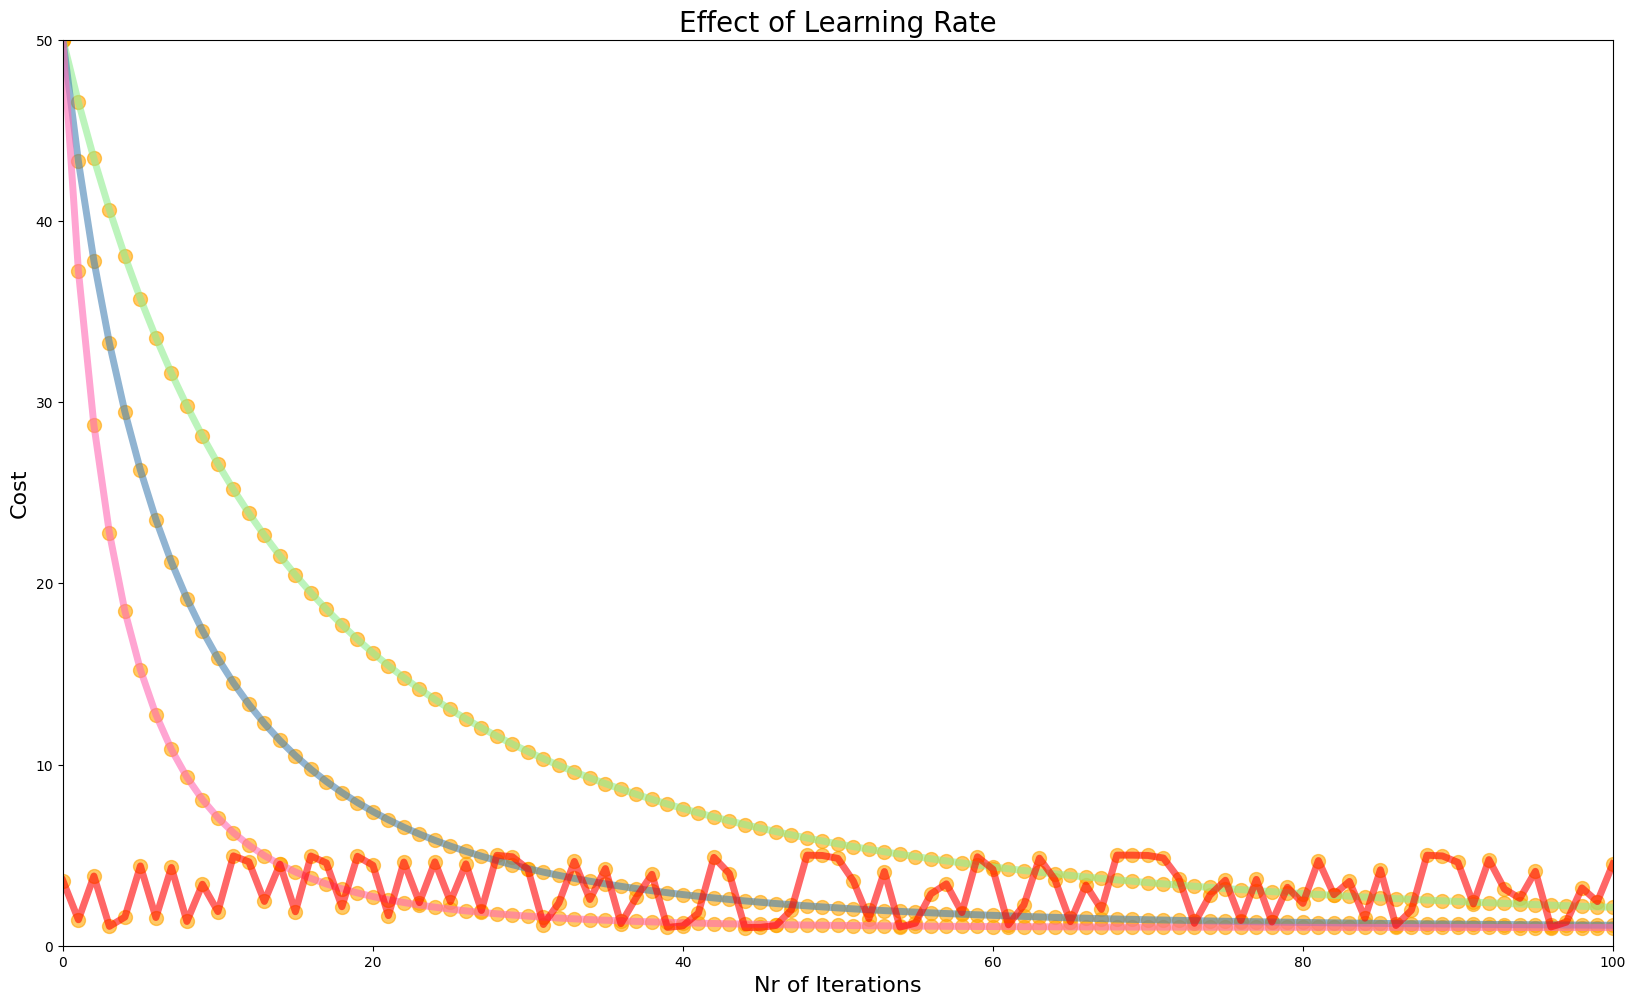

In [26]:
# calling gradient_descent functions
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, max_iter=n, precision=0.0001,
                             multiplier=0.0005)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, max_iter=n, precision=0.0001,
                             multiplier=0.001)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, max_iter=n, precision=0.0001,
                             multiplier=0.002)

# Experiment
mad_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, max_iter=n, precision=0.0001,
                             multiplier=0.25)

plt.figure(figsize=[20, 12], dpi=100)

# Low Learning rate
plt.title('Effect of Learning Rate',fontsize=20)
plt.xlabel('Nr of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)
plt.xlim(0, n)
plt.ylim(0, 50)

low_values = np.array(low_gamma[1])
iteration_list = [x for x in range(0, 101)]
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5, alpha=0.6)
values = np.array(low_values)
plt.scatter(iteration_list, g(values), c='orange', s=100, alpha=0.6)


# Medium Learning rate
low_values = np.array(mid_gamma[1])
iteration_list = [x for x in range(0, 101)]
plt.plot(iteration_list, g(low_values), color='steelblue', linewidth=5, alpha=0.6)
values = np.array(low_values)
plt.scatter(iteration_list, g(values), c='orange', s=100, alpha=0.6)

# High Learning rate
low_values = np.array(high_gamma[1])
iteration_list = [x for x in range(0, 101)]
plt.plot(iteration_list, g(low_values), color='hotpink', linewidth=5, alpha=0.6)
values = np.array(low_values)
plt.scatter(iteration_list, g(values), c='orange', s=100, alpha=0.6)

# Mad Learning rate
low_values = np.array(mad_gamma[1])
iteration_list = [x for x in range(0, 101)]
plt.plot(iteration_list, g(low_values), color='red', linewidth=5, alpha=0.6)
values = np.array(low_values)
plt.scatter(iteration_list, g(values), c='orange', s=100, alpha=0.6)
plt.show()

# Example 4 - Data Visualization with 3D Charts

$$ f(x, y) = \frac{1}{3^{-x^2-y^2} + 1} $$

In [27]:
def f2(x, y):
    r = 3**(-x**2-y**2)
    return 1 / (r + 1)

In [28]:
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

# converting our one dimensional array data to 2D
x_4, y_4 = np.meshgrid(x_4, y_4)
print(f'shape of data is: {x_4.shape}')
print(f'dimension of data is: {x_4.ndim}')

shape of data is: (200, 200)
dimension of data is: 2


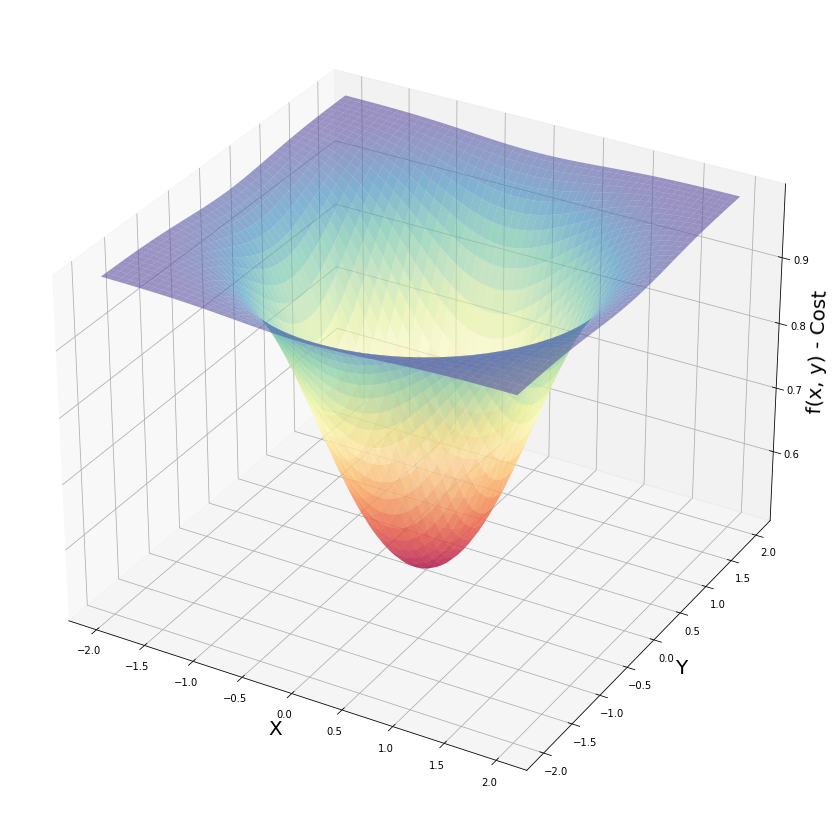

In [29]:
fig = plt.figure(figsize=[20, 15])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f2(x_4, y_4), cmap=cm.Spectral, alpha=0.6)
plt.show()

# Partial Derivatives and Symbolic Computation
## $$ \frac{\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{-x^2-y^2}} {\left(3^{-x^2-y^2} + 1\right)^2}$$

## $$ \frac{\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{-x^2-y^2}} {\left(3^{-x^2-y^2} + 1\right)^2}$$

In [30]:
a, b = symbols('x, y')
f2(a, b)
print(f'Our cost function is : {f2(a, b)}')
diff(f2(a, b), a)
print(f'Partial derivative with respect to x is: {diff(f2(a, b), a)}')
f2(a, b).evalf(subs={a:1.8, b:1.0})
print(f'Value of f(x,y) at x=1.8 and y=1.0 is : {f2(a, b).evalf(subs={a:1.8, b:1.0})}')
diff(f2(a, b), a).evalf(subs={a:1.8, b:1.0})
print(f'The value of the partial derivative with respect to x at x=1.8 and y=1.0 is : {diff(f2(a, b), a).evalf(subs={a:1.8, b:1.0})}')

Our cost function is : 1/(3**(-x**2 - y**2) + 1)
Partial derivative with respect to x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 and y=1.0 is : 0.990604794032582
The value of the partial derivative with respect to x at x=1.8 and y=1.0 is : 0.0368089716197505


# Batch Gradient Descent with SymPy



In [31]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])

for x in range(max_iter):
    gradient_x = diff(f2(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f2(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    

print('Values in gradients array: ', gradients)
print('Minimum value of x is: ', params[0])
print('Minimum value of y is: ', params[1])
print('The cost is: ', f2(params[0], params[1]))

Values in gradients array:  [2.01013037525579e-11 1.11673909736433e-11]
Minimum value of x is:  3.45838599885832e-11
Minimum value of y is:  1.92132555492129e-11
The cost is:  0.500000000000000


<h2>Performance Considerations</h2>
<p> Using SymPy makes our lives so much easier as we can easily calculate the partial derivatives of our
    cost function and also evaluate it at given data points. However, when it comes to running SymPy in 
    optimization code (loop), we'll observe that it is more resource intensive than if we had coded up the function ourselves as done below. This is an important point to take into consideration, because as the data becomes larger and larger we could start witnessing a lag in our code. In conclusion, pick methods to solve problems that are not too resource intensive, except in cases where its the only option </p>

In [32]:
# partial derivatives function for example 4

def fpx(x, y):
    ln = math.log(3)
    top_eq = 2*x * ln * 3**(-x**2 - y**2)
    bottom_eq = (3**(-x**2 - y**2) + 1)**2
    return top_eq / bottom_eq

def fpy(x, y):
    ln = math.log(3)
    top_eq = 2*y * ln * 3**(-x**2 - y**2)
    bottom_eq = (3**(-x**2 - y**2) + 1)**2
    return top_eq / bottom_eq

In [33]:
fpx(1.8, 1.0)

0.036808971619750504

In [39]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])
values_array = params.reshape(1, 2)

for x in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(arr=values_array, values=params.reshape(1, 2), axis=0)
    

print('Values in gradients array: ', gradients)
print('Minimum value of x is: ', params[0])
print('Minimum value of y is: ', params[1])
print('The cost is: ', f2(params[0], params[1]))

Values in gradients array:  [2.01013038e-11 1.11673910e-11]
Minimum value of x is:  3.458385998858304e-11
Minimum value of y is:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Advanced Numpy Arrays

In [45]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])
value_array = params

for x in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    

print('Values in gradients array: ', gradients)
print('Minimum value of x is: ', params[0])
print('Minimum value of y is: ', params[1])
print('The cost is: ', f2(params[0], params[1]))

Values in gradients array:  [2.01013038e-11 1.11673910e-11]
Minimum value of x is:  3.458385998858304e-11
Minimum value of y is:  1.9213255549212797e-11
The cost is:  0.5


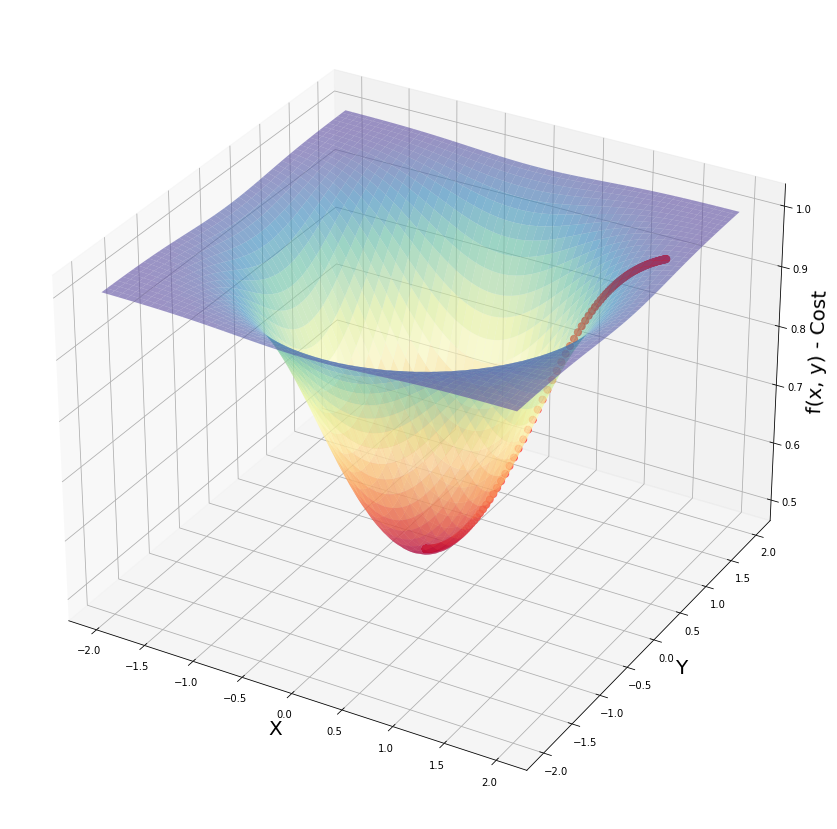

In [46]:
fig = plt.figure(figsize=[20, 15])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f2(x_4, y_4), cmap=cm.Spectral, alpha=0.6)
ax.scatter(values_array[:, 0], values_array[:, 1], f2(values_array[:, 0], values_array[:, 1]), s=50, c='red')
plt.show()

In [36]:
# Advanced Numpy

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print(hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

# Experiment lol
n = 0
for x in range(3):
    print(the_roots[n][0])
    n += 1

the_roots = np.append(arr=the_roots, values=[['Malik', 'MC']], axis=0)

print('Printing nicknames...', the_roots[:, 0])
print('Printing roles...', the_roots[:, 1])

(1, 2)
(2, 2)
Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Black Thought
Questlove
Captain
Printing nicknames... ['Black Thought' 'Questlove' 'Captain' 'Malik']
Printing roles... ['MC' 'Drums' 'Guitar' 'MC']


# Working with Data & A Real Cost Function
## Mean Squared Error: A Cost Function for Regression Problems

### $$RSS =  \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE =  \frac{1}{n}\sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE =  \frac{1}{n}\sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

### $$ \hat{y} = h_\theta x^{(i)}$$

In [50]:
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).transpose()

print(f"shape of x_5: {x_5.shape}")
print(f"shape of y_5: {y_5.shape}")

shape of x_5: (7, 1)
shape of y_5: (7, 1)


In [55]:
regr = LinearRegression()
regr.fit(x_5, y_5)
theta_0 = regr.intercept_[0]
theta_1 = regr.coef_[0][0]

print('Theta 0: ', theta_0)
print('Theta 1: ', theta_1)

Theta 0:  0.8475351486029554
Theta 1:  1.222726463783591


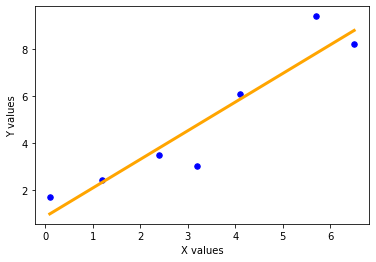

In [56]:
plt.scatter(x_5, y_5, s=30, c='blue')
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()